# Домашнее задание по теме «Классические модели ML»

В этом домашнем задании тебе нужно:
- применить ML-модели для задачи регрессии и объяснить их решения;
- самостоятельно реализовать kNN (бонусная задача).



## Подготовка

Импортируем необходимые библиотеки.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

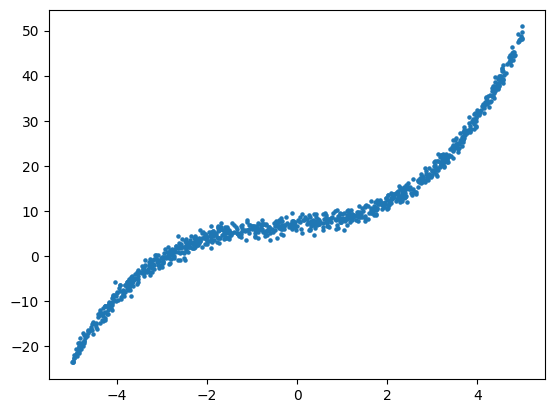

In [2]:
# Функция для создания нашего датасета
def generate_dataset(B, n):
    e = np.random.normal(0, 1, n)
    X = np.random.uniform(-5, 5, n)
    y = 0
    for i in range(len(B)):
        y += B[i] * X**i
    y += e
    return X, y

n = 1000
np.random.seed(123) # Фиксируем случайность генератора
B = [7, 1, 0.25, 0.25] # Задаём коэффициенты для сгенерированных данных
X, y = generate_dataset(B, n)

# Преобразуем X к табличному виду
X = X.reshape((-1, 1))

# Нарисуем, что получилось
plt.scatter(X, y, s=5)
plt.show()

Теперь разделим выборки на `train` и `test`. Это необходимо, чтобы продемонстрировать различия в работе моделей.

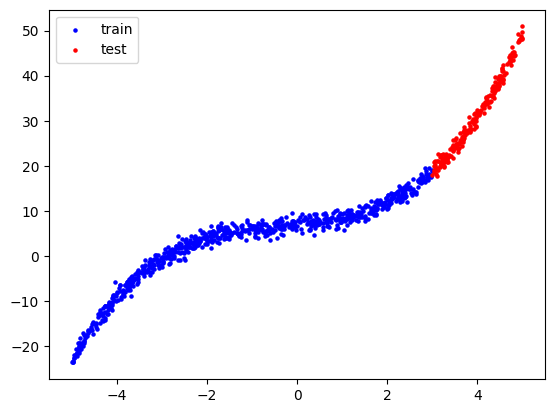

In [3]:
# Разделим их по переменной X. Пусть это будет число 3
mask = X<=3
X_train, y_train, X_test, y_test = X[mask], y[mask.ravel()], X[~mask], y[~mask.ravel()]
X_train = X_train.reshape((-1, 1))
X_test = X_test.reshape((-1, 1))

# Нарисуем, как будут выглядеть обучающий и тестовый датасеты
plt.scatter(X_train, y_train, c='blue', label='train', s=5)
plt.scatter(X_test, y_test, c='red', label='test', s=5)
plt.legend()
plt.show()

In [4]:
def visulize_regression(model, step=0.01):
  # Делаем «сетку» для предсказаний
  X_mesh = np.arange(X.min(), X.max(), step).reshape((-1, 1))
  # Делаем предсказание для сетки
  preds = model.predict(X_mesh)
  # Рисуем
  plt.plot(X_mesh, preds, c='orange', label='Regression')

def visualize_all(model, step=0.01):
  plt.scatter(X_train, y_train, c='blue', label='train', s=5)
  plt.scatter(X_test, y_test, c='red', label='test', s=5)
  visulize_regression(model)
  plt.legend()
  plt.show()

Проверим, что всё работает.

MAE: 9.784801759050154, MSE: 138.40947023184697


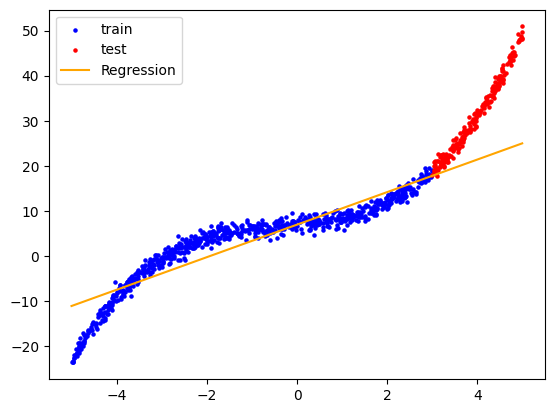

In [5]:
# Импортируем линейную модель
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Инициализируем
model = LinearRegression(n_jobs=-1)
# И обучим
model.fit(X_train, y_train)

def show_metrics(model, X_test, y_test):
    predict = model.predict(X_test)
    mae = mean_absolute_error(y_test, predict)
    mse = mean_squared_error(y_test, predict)
    print(f"MAE: {mae}, MSE: {mse}")


# А теперь визуализируем всё
show_metrics(model, X_test, y_test)
visualize_all(model)

Всё работает. Теперь попробуй решить задачи!

## Задача 1. Обучение разных моделей регрессии [6 баллов]

Тебе нужно обучить ML-модели и объяснить, почему получились такие предсказания. Не забывай, что модели обучены на подвыборке `train`, поэтому особое внимание удели интерпретации работы алгоритмов на `test`-подвыборке.

Используй модели:
1. Линейная регрессия.
2. SVM.
3. kNN.
4. Дерево решений.
5. Случайный лес.
6. Бустинг над деревьями.

Для каждой модели нужно выполнить следующие пункты:
1. Обучить модель регрессии на `train`-подвыборке. **[0,25 балла]**
2. Визуализировать регрессию и объяснить, почему получился такой результат. **[0,25 балла]**
3. Для каждого алгоритма один раз изменить параметры или, например, добавить полиномы, чтобы улучшить результат решения задачи. **[0,25 балла]**
4. Описать, что получилось. Если качество решения не удаётся улучшить простыми методами, объясни, с чем это связано. **[0,25 балла]**

> **Важно.** Для линейной регресии пункт 1 уже выполнен выше как пример, поэтому баллы за этот пункт не начисляются. Начинай сразу с пункта 2. За построение всех моделей, визуализацию и доработку ты можешь получить 0,75 + 1 + 1 + 1 + 1 + 1 = 5,75 балла.

В конце напиши выводы о преимуществах и недостатках каждой модели. **[0,25 балла]**

## Твой ответ на задачу 1

### Линейная регрессия

2. Почему получился такой результат?



In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

def show_metrics(model, X_test, y_test):
    predict = model.predict(X_test)
    mae = mean_absolute_error(y_test, predict)
    mse = mean_squared_error(y_test, predict)
    print(f"MAE: {mae}, MSE: {mse}")

poly = PolynomialFeatures(degree=3, include_bias=False)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression().fit(X_train_poly, y_train)
show_metrics(model, X_test_poly, y_test)


MAE: 0.7883926010626714, MSE: 0.9798599591608749


4. Что получилось после попытки улучшить решение?

Конечно, поскольку наша функция кубическая, то представление в полиномиальном пространстве кратно увеличивает точность предсказаний

### SVM

In [7]:
from sklearn.svm import SVR

In [8]:
model = SVR(kernel="rbf",C=100, gamma="auto")
model.fit(X_train, y_train) 
show_metrics(model, X_test, y_test)


MAE: 19.210650036945626, MSE: 588.4771848827596


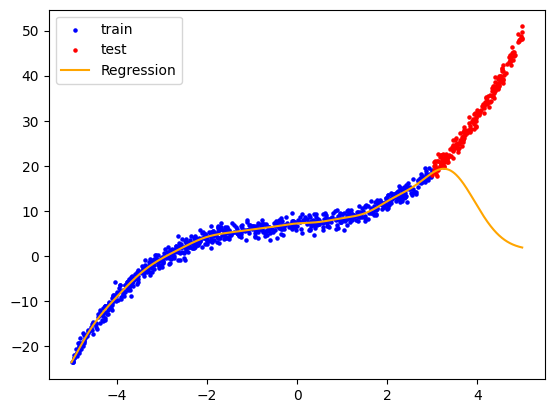

In [9]:
# 2. Сделай визуализацию
visualize_all(model)

2. Почему получился такой результат?



потому что мы не знаем степень полинома

In [10]:
model = SVR(kernel="poly", degree=3, C=100, gamma="auto")
model.fit(X_train, y_train)
show_metrics(model, X_test, y_test)

MAE: 7.1289591242237345, MSE: 54.270456566137895


4. Что получилось после попытки улучшить решение?

на валидации получилось в разы лучше после применения полиномиального ядра со степенью 3

### kNN

In [11]:
from sklearn.neighbors import KNeighborsRegressor

In [12]:
model = KNeighborsRegressor(n_neighbors=10)
model.fit(X_train, y_train)
show_metrics(model, X_test, y_test)


MAE: 12.894977456817069, MSE: 239.18359352181815


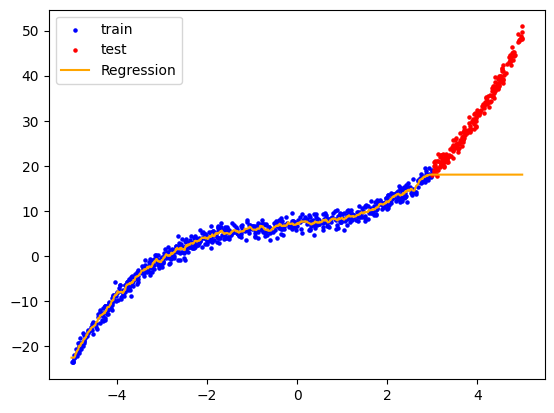

In [13]:
visualize_all(model)

2. Почему получился такой результат?



Потому что такова логика knn, восстанавливать значения по ближайшим соседям, а не строить новое

MAE: 16.21118887442629, MSE: 335.7760544216274


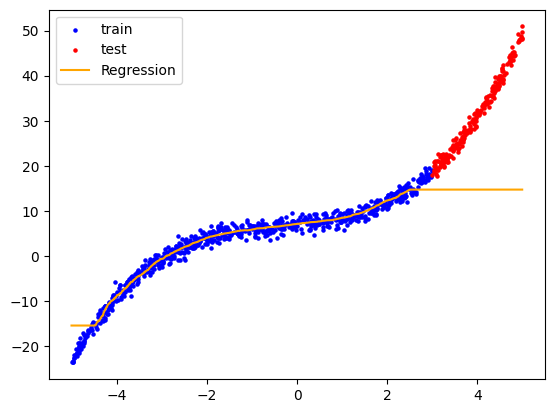

In [14]:
model = KNeighborsRegressor(n_neighbors=100) 
model.fit(X_train, y_train)
show_metrics(model, X_test, y_test)
visualize_all(model)

4. Что получилось после попытки улучшить решение?

Предсказания стали менее шумными, но на тесте модель по прежнему не умеет экстраполировать качественно

### Дерево решений

In [15]:
from sklearn.tree import DecisionTreeRegressor

In [16]:
model = DecisionTreeRegressor(max_depth=3)
model.fit(X_train, y_train)
show_metrics(model, X_test, y_test)


MAE: 15.797970932388976, MSE: 322.5492952799116


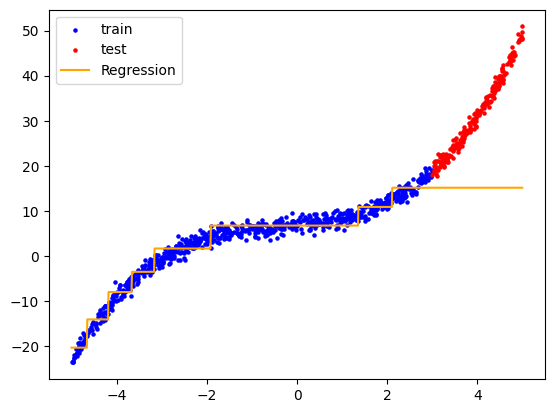

In [17]:
visualize_all(model)

2. Почему получился такой результат?



потому что деревья задают кусочно заданную функцию

MAE: 12.989571930335423, MSE: 241.65425900608068


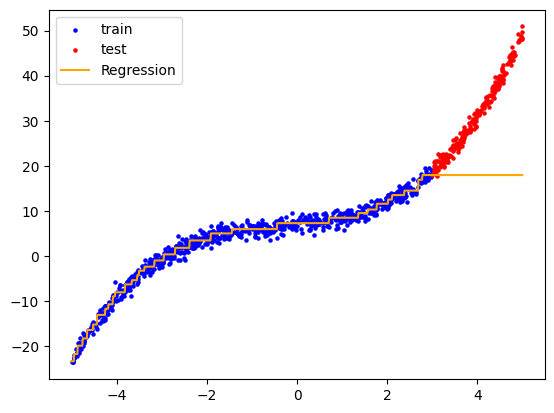

In [18]:
model = DecisionTreeRegressor(max_depth=5)
model.fit(X_train, y_train)
show_metrics(model, X_test, y_test)
visualize_all(model)

4. Что получилось после попытки улучшить решение?

без особых улучшений, всё также не может экстраполировать

### Случайный лес

In [19]:
from sklearn.ensemble import RandomForestRegressor

In [20]:
model = RandomForestRegressor(n_estimators=100, max_depth=3)
model.fit(X_train, y_train)
show_metrics(model, X_test, y_test)


MAE: 15.187862311797995, MSE: 303.64457130143853


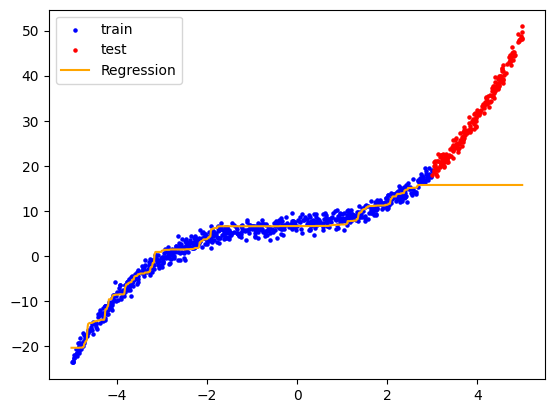

In [21]:
visualize_all(model)

2. Почему получился такой результат?



MAE: 12.60502186552824, MSE: 231.64233391496867


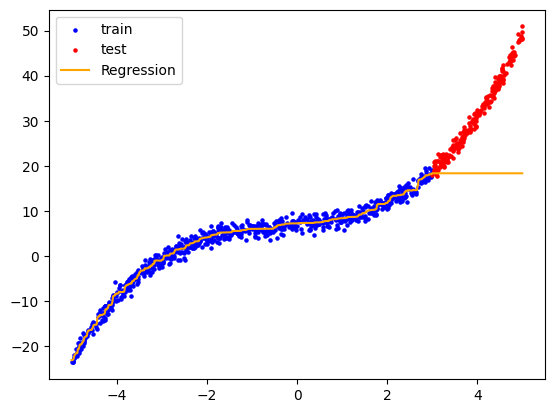

In [22]:
model = RandomForestRegressor(n_estimators=100, max_depth=5)
model.fit(X_train, y_train)
show_metrics(model, X_test, y_test)
visualize_all(model)

4. Что получилось после попытки улучшить решение?

всё также плохо)

### Бустинг над деревьями

In [23]:
from sklearn.ensemble import GradientBoostingRegressor

In [24]:
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
model.fit(X_train, y_train)
show_metrics(model, X_test, y_test)
    

MAE: 12.150516708164242, MSE: 220.05111904009925


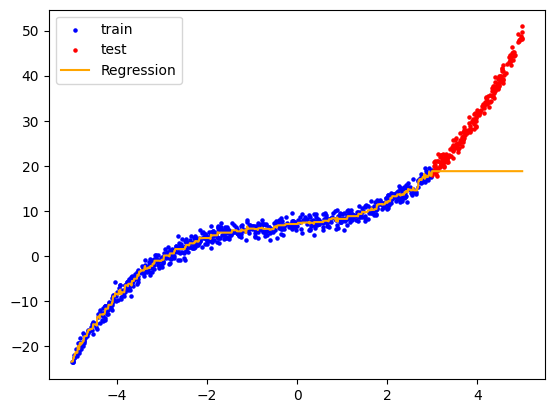

In [25]:
visualize_all(model)

2. Почему получился такой результат?



всё также

In [26]:
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
model.fit(X_train, y_train)
show_metrics(model, X_test, y_test)

MAE: 12.150516708164242, MSE: 220.05111904009925


4. Что получилось после попытки улучшить решение?

ничего не получится

### Выводы

Какие выводы можно сделать о рассмотренных моделях?




> **Примечание.** Скорее всего, у тебя не получилось cделать хорошие предсказания деревянными моделями (дерево решений, случайный лес, бустинг над деревьями) и kNN. При этом в лекции и семинаре говорилось, что бустинг — сильнейшая модель для табличных данных. Как работать с такого рода зависимостями деревянными моделями, разберём в теме «Временные ряды».

SVM - лучшая модель для задач экстраполяции при условии, что мы знае степень полинома

## Задача 2. Ансамблирование [4 балла]

Чтобы частично решить эту проблему прямо сейчас, можно построить ансамбль моделей. Для этого нужно взять несколько моделей и усреднить их предсказания. Можно взять не среднее, а с некоторыми весами, которые подбираются ровно так же, как и гиперпараметры моделей.

Тебе нужно:
1. Посмотреть докумментацию [VotingRegressor](https://scikit-learn.ru/stable/modules/generated/sklearn.ensemble.VotingRegressor.html). **[0 баллов]**
2. Создать модель VotingRegressor, состоящую из трёх используемых ранее моделей **[1 балл]**, при этом:
  * включить линейную регерессию с кубическим полиномом;
  * включить деревянную модель или kNN;
  * добавить третью модель на своё усмотрение.
3. Описать, что получилось. **[1 балл]**
4. Изменить весовую схему в VotingRegressor в пользу линейной регрессии. **[1 балл]**
5. Описать, что получилось. **[1 балл]**

> **Примечание.** Если включать некачественно работающую модель в ансамбль (деревянные модели или kNN), то совокупный результат будет хуже, чем для линейной регрессии с полиномом третьей степени. Но смысл этой задачи — показать, как простыми методами можно делать ансамбль моделей и что часто ансамбль позволяет улучшить решение.


### Твой ответ на задачу 2

In [27]:
# 1. Импортируй  VotingRegressor
from sklearn.ensemble import VotingRegressor

In [28]:
# 2. Сделай линейную модель с полиномом третьей степени
from sklearn.pipeline import make_pipeline

lin_model = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
tree_model = DecisionTreeRegressor()
knn_model= KNeighborsRegressor()
# Собери VotingRegressor из линейной регрессии и деревянной модели или kNN. Третью модель выбери самостоятельно
vreg = VotingRegressor([
    ("lin", lin_model),
    ("tree", tree_model),
    ("knn", knn_model)
], n_jobs=-1)

In [29]:
# 3. Обучи ансамбль
vreg.fit(X_train, y_train)

VotingRegressor(estimators=[('lin',
                             Pipeline(steps=[('polynomialfeatures',
                                              PolynomialFeatures(degree=3)),
                                             ('linearregression',
                                              LinearRegression())])),
                            ('tree', DecisionTreeRegressor()),
                            ('knn', KNeighborsRegressor())],
                n_jobs=-1)

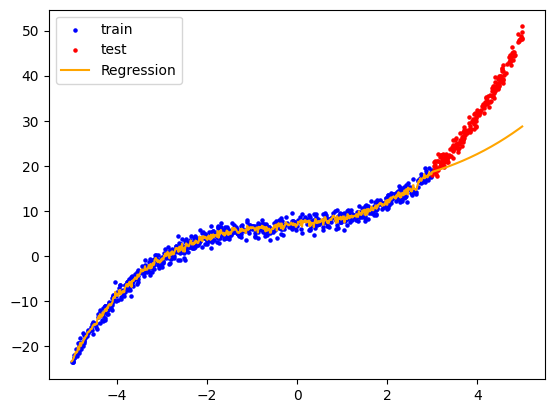

MAE: 0.49299224836508654, MSE: 0.3892498281796394


In [30]:
# 4. Нарисуй, что получилось
visualize_all(vreg)
show_metrics(vreg, X_train, y_train)

3. Стало ли лучше предсказание относительно деревянной модели? Почему?

стало лучше

In [31]:
# 5. Измени весовую схему
# Скопируй твой код выше и добавь весовую схему, где вес существенно больше 0,33 присваивается линейной регерссии
# Сделай линейную модель с полиномом 3-й степени
lin_model = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
tree_model = DecisionTreeRegressor()
knn_model = KNeighborsRegressor()
vreg = VotingRegressor(
    [("lin", lin_model), ("tree", tree_model), ("knn", knn_model)], n_jobs=-1, weights=[0.8, 0.2, 0.2]
)

In [32]:
# 6. Обучи модель
vreg.fit(X_train, y_train)

VotingRegressor(estimators=[('lin',
                             Pipeline(steps=[('polynomialfeatures',
                                              PolynomialFeatures(degree=3)),
                                             ('linearregression',
                                              LinearRegression())])),
                            ('tree', DecisionTreeRegressor()),
                            ('knn', KNeighborsRegressor())],
                n_jobs=-1, weights=[0.8, 0.2, 0.2])

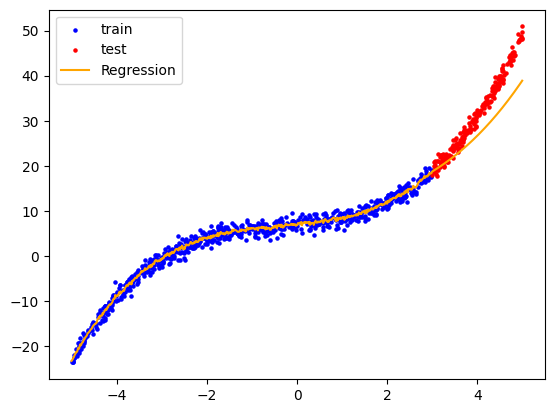

MAE: 12.150516708164242, MSE: 220.05111904009925


In [33]:
# 7. Нарисуй, что получилось
visualize_all(vreg)
show_metrics(model, X_test, y_test)

5. Что ты видишь? В чём смысл ансамблирования моделей? Удаётся ли одним моделям хотя бы частично компенсировать недостатки других моделей?

В целом да

## Задача 3. Самописный kNN [2 дополнительных балла]

Тебе необходимо самостоятельно реализовать алгоритм k ближайших соседей.

Для поиска ближайших соседей существует несколько алгоритмов, но тебе необходимо будет реализовать самый простой вариант — вычисление расстояний между всеми наблюдениями `train`- и `test`-выборок.

Это алгоритмически сложно, но на маленькой выборке посчитать это не составит труда.

Проверить работоспособность алгоритма нужно на нашем сгенерированном датасете. Но kNN не очень хорошо предсказывает точки за пределами значений `train`-подвыборки. Поэтому, чтобы проверить работоспособность алгоритма, сделай разбиение на `train` и `test` иначе — всё перемешаем и случайно разделим выборки.

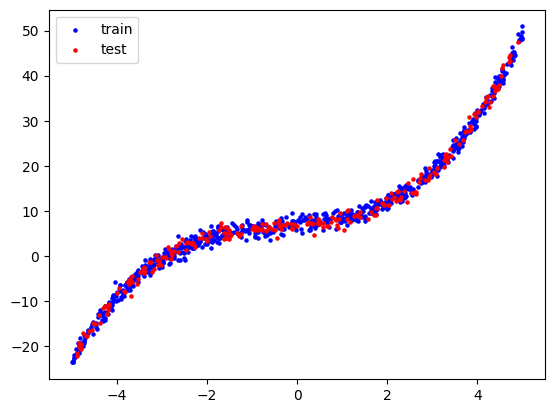

In [34]:
from sklearn.model_selection import train_test_split
# Делаем новое разбиение
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

# Нариcуем
plt.scatter(X_train, y_train, c='blue', label='train', s=5)
plt.scatter(X_test, y_test, c='red', label='test', s=5)
plt.legend()
plt.show()

Теперь можно приступать к реализации kNN.

Что тебе нужно сделать:
1. Реализовать класс kNN **[1,5 балла]**, который:
  * При инициализации принимает число соседей.
  * Считает евклидову меру попарно между всеми наблюдениями `train` и `test`. Хорошо, если векторизуешь, но можно и в цикле. На выходе должна быть матрица размерности `len(X_train)` на `len(X_test)` или наоборот. Зависит от того, в каком порядке ты подашь их функции вычисления расстояния.
  * Содержит метод вычисления ближайших соседей для каждого наблюдения.
  * Содержит метод `fit`, который просто запоминает `train`-данные.
  * Содержит метод `predict` для предсказания.

2. Обучи модель, получи предсказания и нарисуй, что у тебя получилось. Все предсказания должны лежать примерно на нашей зависимости. **[0,5 балла]**

**[Евклидово расстояние](https://habr.com/ru/articles/579914/)** — мера расстояния между точками. По сути это просто длина отрезка между двумя точками.

В n-мерном пространстве его формула выглядит следующим образом:
$$ d = \sqrt{Σ_{i=1}^n(x_i-y_i)^2}.$$

Корень можно не считать. Это монотонное преобразование, а значит, оно не будет изменять упорядоченность точек. То есть ближайшие точки с корнем и без корня не изменятся. А вычислительная сложность без корня будет чуть ниже.

### Твой ответ на задачу 3

In [36]:
# 1. Реализуй класс kNN
class kNN:
  def __init__(self, n_neighbors=5):
    self.n_neighbors = n_neighbors

  @staticmethod # Статичный метод обозначает, что он не обращается к self. Здесь нам не надо обращаться к self для вычисления расстояний
  def euclidean_distance(A: np.ndarray, B: np.ndarray): # A и B — просто некторые матрицы
    return np.sqrt(np.sum(A**2, axis=1, keepdims=True)-2*np.dot(A, B.T)+np.sum(B**2, axis=1))

  def get_least_k(self, X):
    dists = self.euclidean_distance(X_test, self.X_train) # Считаем расстояния
    return np.argpartition(dists, kth=self.n_neighbors, axis=1)[:, :self.n_neighbors]

  def fit(self, X_train, y_train):
    self.X_train = X_train
    self.y_train = y_train

  def predict(self, X_test):
    top_k = self.get_least_k(X_test) # Получаем топ индексов с наименьшими расстояниями
    return np.mean(self.y_train[top_k], axis=1)

In [37]:
model = kNN(n_neighbors=5)

In [40]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

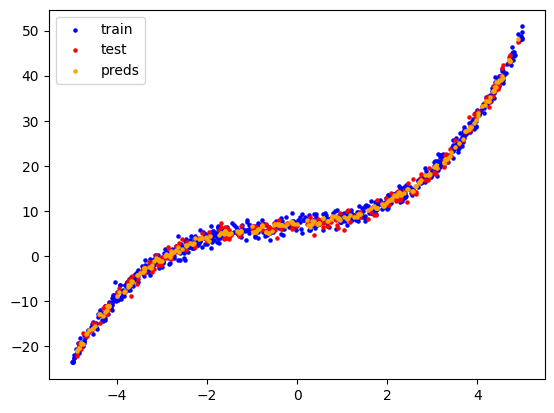

In [45]:
# 4. Нариcуй, что получилось
plt.scatter(X_train, y_train, c='blue', label='train', s=5)
plt.scatter(X_test, y_test, c='red', label='test', s=5)
plt.scatter(X_test, y_pred, c='orange', label='preds', s=5)
plt.legend()
plt.show()